# EchoScope: Spotify Track Analysis & Recommendation System

## Clustering

### Set up the libraries and the dataset

In [1]:
import pandas as pd
from sklearn.decomposition import PCA # Dimensionality reduction.
from sklearn.cluster import KMeans # Clustering.
from sklearn.metrics import silhouette_score # Evaluation.
import matplotlib.pyplot as plt # Plotting.
import seaborn as sns # Plotting.

clean_tracks_df = pd.read_csv('dataset_clean.csv')

numeric_features = ["danceability", "energy", "loudness", "speechiness", "acousticness",
                    "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]

X = clean_tracks_df[numeric_features]

### Understand the importance of each feature

In [2]:
pca = PCA(n_components=2) # 2D for visualization purposes.
X_pca = pca.fit_transform(X)

print("Explained Variance (2 Components):", sum(pca.explained_variance_ratio_))

Explained Variance (2 Components): 0.4397857615654085


Plot the explained variance.

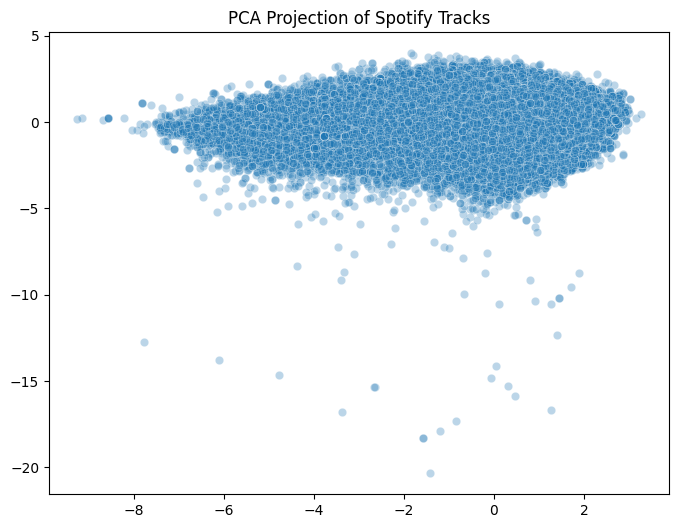

In [3]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], alpha=0.3)
plt.title("PCA Projection of Spotify Tracks")
plt.show()

### Apply K-means clustering.

Run the algorithm.

In [ ]:
k = 5 # Choose the number of clusters.
kmeans = KMeans(n_clusters=k, random_state=26) # Fix the random seed for reproducibility.
clusters = kmeans.fit_predict(X)
df['cluster'] = clusters # Add a new label specifying the cluster of each track.

Evaluate the clusters. <br>
The silhouette score ranges from -1 to +1:
- If the score approaches 1, the clusters are well separated.
- If the score approaches 0, the clusters overlap.
- If the score is below 0, the assignments are wrong.
Generally speaking, this evaluation can come in handy to assess how many clusters are needed to get good results.

In [ ]:
score = silhouette_score(X, clusters)
print("Silhouette Score:", score)

Visualize and analyze the clusters.

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="tab10", alpha=0.6)
plt.title("K-Means Clusters (With PCA)")
plt.show()

In [ ]:
# Analyze the size of each cluster to check if the results are balanced.
print(df['cluster'].value_counts())

# Compute the average feature values of each cluster to deduce its main features.
df.groupby('cluster')[numeric_features].mean()

### Save the resulting data frame

In [ ]:
df.to_csv("../EchoScope/dataset_clustered.csv", index=False)